# Financial Analysis of Top 30 Companies in Nifty 50 

The Following dataset was obtained through scrapping Yahoo finance website. The Article **'5 Must-Have Metrics for Value Investors'** on Investopedia.com ,states, P/E ratio , P/B ratio, D/E ratio, PEG, FCF as the 5 main metrics for evaluating the performance of a stock of that company. We try to obtain the 5 metrics from the srapped data and **build a model to predict the stock price** 

### 1 : Obtaining the data(Webscraping)  

* Refer to the python file 'webscrapper.py' to see the code for scrapping the website Yahoo finance. 
* BeautifulSoup library was used to scrape Yahoo Finance website 
* Symbols from the content page of Nifty 50 
* The Url for the statistics page was formatted and iterated to generate url of all statistics page of Companies 
* All the necessary variables were grabbed through find ,find_all and CSS selector 
* The information was stored in lists and these lists were sent to a csv file as columns 

### 2 : Data Cleaning ### 

There are missing values in the DataFrame. If the column of missing values consist of the major 5 metrics mentioned above article, then we will find that information on other website and impute them and if more than 2 values are missing for a company we will drop that company 

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('Stock_analysis_df.csv')
df.head()

,Unnamed: 0,Symbol,Company_name,Stock_price,Market_cap,Trailing_PE,Forward_PE,Price_sales_ratio,Price_book_ratio,BVPS,Profits,Quarterly_Earnings_Growth,D_E_ratio,outstanding_shares
0,0,TCS.NS,Tata Consultancy Services Limited,"3,219.40",11.86T,28.14,24.57,5.26,13.12,247.06,18.69%,14.80%,8.43,3.66B
1,1,NESTLEIND.NS,Nestlé India Limited,"21,745.85",1.99T,78.55,NaN,11.30,81.02,255.06,14.34%,23.90%,11.12,96.42M
2,2,INDUSINDBK.NS,IndusInd Bank Limited,"1,150.90",855.04B,11.49,9.42,3.32,1.55,709.01,34.98%,45.90%,NaN,775.89M
3,3,ITC.NS,ITC Limited,424.45,4.89T,26.75,23.98,7.04,7.45,52.98,26.07%,23.40%,0.38,12.43B
4,4,ADANIENT.NS,Adani Enterprises Limited,"1,919.85",2.11T,101.44,NaN,1.59,6.67,277.23,1.58%,NaN,113.86,1.14B


Some columns seem to have missing values. Let's see which columns have missing values and how much 

In [3]:
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Forward_PE                   8
BVPS                         1
Profits                      1
Quarterly_Earnings_Growth    3
D_E_ratio                    5
outstanding_shares           1
dtype: int64


* Forward_PE has 8 missing values ,hence we can drop it.
* D_E ratio is important hence imputing or finding a formula to calculate D_E is reasonable ,else I will impute it with 0. 
* Quaterly Earnings Growth, BVPS, outstanding shares and Profits have 3 or fewer missing values. Its easy enough to look for those values online on other sites  

In [4]:
df = df.drop('Forward_PE',axis=1)

In [5]:
df = df.drop('Unnamed: 0',axis=1)

Find out which rows have missing values 

In [6]:
df[df['BVPS'].isnull()].index.tolist()

[11]

In [7]:
df[df['Profits'].isnull()].index.tolist()

[11]

In [8]:
df[df['outstanding_shares'].isnull()].index.tolist()

[11]

In [9]:
df[df['Quarterly_Earnings_Growth'].isnull()].index.tolist()

[4, 11, 22]

In [10]:
df[df['D_E_ratio'].isnull()].index.tolist()

[2, 6, 11, 13, 19]

Drop Row 11 which is Reliance Industries Limited since it has 3 out of 7 variables missing. This leaves Quaterly Earnings Growth for indices 4,22 which are 'Adani Enterprises Limited' and 'Tata Steel Limited' respectively and D_E_ratio for indices 2,6,13,19
We can look for those values on a different website and fill in the missing values. 

In [11]:
df = df.drop(index=11,axis=0)

According to **topstockresearch.com** the D/E ratios are -

* IndusInd Bank Limited (2) = 0.89 
* ICICI Bank Limited (6)= 0.881
* Kotak Mahindra bank(13) = 0.568 
* Bajaj Auto Limited(19)= 0


In [12]:
df.at[2,'D_E_ratio'] = 0.89 
df.at[6,'D_E_ratio'] = 0.881 
df.at[13,'D_E_ratio'] = 0.568 
df.at[19,'D_E_ratio'] = 0


I cannot clearly find the Quarterly Earnings Growth for Adani Enterprise and Tata Steel Limited. These two companies have all other variables . Hence, its better to drop Quarterly Earnings Growth column which is ratio of previous quarter's earnings to current quarter's earnings. 

In [13]:
df = df.drop('Quarterly_Earnings_Growth',axis=1)

In [14]:
df.isnull().any().sum()

0

In [15]:
df.reset_index(drop=True)

,Symbol,Company_name,Stock_price,Market_cap,Trailing_PE,Price_sales_ratio,Price_book_ratio,BVPS,Profits,D_E_ratio,outstanding_shares
0,TCS.NS,Tata Consultancy Services Limited,"3,219.40",11.86T,28.14,5.26,13.12,247.06,18.69%,8.430,3.66B
1,NESTLEIND.NS,Nestlé India Limited,"21,745.85",1.99T,78.55,11.30,81.02,255.06,14.34%,11.120,96.42M
2,INDUSINDBK.NS,IndusInd Bank Limited,"1,150.90",855.04B,11.49,3.32,1.55,709.01,34.98%,0.890,775.89M
3,ITC.NS,ITC Limited,424.45,4.89T,26.75,7.04,7.45,52.98,26.07%,0.380,12.43B
4,ADANIENT.NS,Adani Enterprises Limited,"1,919.85",2.11T,101.44,1.59,6.67,277.23,1.58%,113.860,1.14B
5,BAJAJFINSV.NS,Bajaj Finserv Ltd.,"1,349.05",2.17T,35.47,2.72,5.01,291.20,7.96%,215.980,1.59B
6,ICICIBANK.NS,ICICI Bank Limited,922.10,6.38T,19.09,4.79,2.97,307.13,26.45%,0.881,6.98B
7,BAJFINANCE.NS,Bajaj Finance Limited,"6,249.15",3.54T,33.02,14.09,7.38,899.66,44.85%,316.390,605.92M
8,APOLLOHOSP.NS,Apollo Hospitals Enterprise Limited,"4,490.80",621.18B,73.98,4.11,10.37,416.88,4.82%,63.540,143.78M
9,TITAN.NS,Titan Company Limited,"2,663.85",2.30T,75.82,6.16,22.47,115.18,7.97%,74.650,887.79M


In [16]:
df.columns 

Index(['Symbol', 'Company_name', 'Stock_price', 'Market_cap', 'Trailing_PE',
       'Price_sales_ratio', 'Price_book_ratio', 'BVPS', 'Profits', 'D_E_ratio',
       'outstanding_shares'],
      dtype='object')

* Our Data may appear ready but there are few Data Cleaning steps necessary.Since all data are numeric we will convert all columns to float
* Stock_price and BVPS have ',' where values are greater than 999.Remove commas
* The columns Market Cap and Outstanding Shares are given in Billions,Trillions and Millions 
* Convert all Market Cap values to Trillions and onvert all outstanding Shares to billions and remove symbols 


In [17]:
#Remove commas
df['Stock_price'] = df['Stock_price'].apply(lambda x : x.replace(',',''))
df['BVPS'] = df['BVPS'].apply(lambda x : x.replace(',',''))

In [18]:
# Convert all Market Cap values to Trillions 
df['Market_cap'] = df['Market_cap'].apply(lambda x : x.replace('T',''))
df['Market_cap'] = df['Market_cap'].apply(lambda x : x.replace('B',''))
df['Market_cap'] = df['Market_cap'].astype('float64')
df['Market_cap'] = df['Market_cap'].apply(lambda x : x/1000 if x > 20 else x)

In [19]:
# Convert all outstanding Shares to billions 
df['outstanding_shares'] = df['outstanding_shares'].apply(lambda x : x.replace('B',''))
df['outstanding_shares'] = df['outstanding_shares'].apply(lambda x : x.replace('M',''))
df['outstanding_shares'] = df['outstanding_shares'].astype('float64')
df['outstanding_shares'] = df['outstanding_shares'].apply(lambda x : x/1000 if x > 50 else x)

In [20]:
#remove symbols 
df['Profits'] = df['Profits'].apply(lambda x: x.replace('%',''))

In [21]:
#convert all columns to float
num_cols = ['Stock_price','Trailing_PE','Price_sales_ratio','Price_book_ratio','BVPS','Profits','D_E_ratio']
df[num_cols] = df[num_cols].astype('float64')

In [22]:
df.head()

,Symbol,Company_name,Stock_price,Market_cap,Trailing_PE,Price_sales_ratio,Price_book_ratio,BVPS,Profits,D_E_ratio,outstanding_shares
0,TCS.NS,Tata Consultancy Services Limited,3219.40,11.86000,28.14,5.26,13.12,247.06,18.69,8.43,3.66000
1,NESTLEIND.NS,Nestlé India Limited,21745.85,1.99000,78.55,11.30,81.02,255.06,14.34,11.12,0.09642
2,INDUSINDBK.NS,IndusInd Bank Limited,1150.90,0.85504,11.49,3.32,1.55,709.01,34.98,0.89,0.77589
3,ITC.NS,ITC Limited,424.45,4.89000,26.75,7.04,7.45,52.98,26.07,0.38,12.43000
4,ADANIENT.NS,Adani Enterprises Limited,1919.85,2.11000,101.44,1.59,6.67,277.23,1.58,113.86,1.14000


In [23]:
#import numpy as np
#df['log_SP'] = df['Stock_price'].apply(lambda x : np.log(x))
#ax = sns.regplot(x = df.Profits,y=df.log_SP)
#ax.set(xlabel = 'Market cap',ylabel ='Stock Price in Rupees')
#plt.show()

In [24]:
#ax = sns.regplot(x = df.Price_sales_ratio,y=df.Stock_price)
#ax.set(xlabel = 'Market cap',ylabel ='Stock Price in Rupees')
#plt.show()

### 3) Feature Engineering 

Use Mutual Information to find features that have the most corelation with the target. This is a small dataset .hence I don't expect there to be a profound corelation between features and the target 

In [26]:
from sklearn.feature_selection import mutual_info_regression 
from sklearn.model_selection import train_test_split
features = ['Trailing_PE','Price_sales_ratio','Price_book_ratio','BVPS','Profits','D_E_ratio','outstanding_shares','Market_cap']
X = df[features]
y = df.Stock_price
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=1)


In [27]:
def make_mi_scores(X,y,discrete):
    mi_score = mutual_info_regression(X,y,discrete_features=discrete)
    mi_scores = pd.Series(mi_score,name="MI_Scores",index=X.columns)
    return mi_scores 
scores = make_mi_scores(X_train,y_train,False)

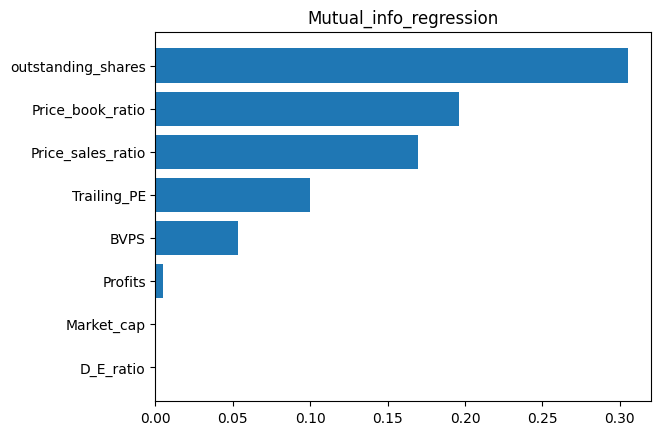

In [28]:
def make_mi_plots(scores):
    scores = scores.sort_values(ascending = True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width,scores)
    plt.yticks (width,ticks)
    plt.title('Mutual_info_regression')
make_mi_plots(scores)

* Outstanding shares has the most interaction with the target,which was unexpected. P/B ,P/S ,P/E and BVPS are important ratios which indicates the financial condition of a company. 
* **P/B ratio**: Its a measure of a company's stock being overvalued or undervalued by comparing the stock price to its BVPS. 
* **P/E ratio** Determines the market value of stock compared its earnings. A high p/e value indiacates that the stock is expensive relative to earnings. 
* **BVPS** : BVPS is common equity divided by outstanding shares 




### 4 : Model

Random Forest Regressor from sklearn library will be used. The main focus of this project was to scrap the data. I believe the model from such small dataset won't be able to capture intricacies of the data. Since the dataset is small we can use cross validation to evaluate our model 

In [29]:
# A function to find the optimum n_estimators 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
def n_estimator(n_est):
    model = RandomForestRegressor(n_estimators = n_est,random_state=1)
    cv_scores = -1 * cross_val_score(model,X_train,y_train,cv=5,scoring='neg_mean_absolute_error')
    return cv_scores.mean()
results = {}
for i in range(1,9):
    results[50*i] = n_estimator(50*i)
print(results)

{50: 1799.5245666666665, 100: 1879.600066666666, 150: 1870.1576, 200: 1853.1516250000004, 250: 1842.7462833333343, 300: 1866.2950611111123, 350: 1870.9729785714294, 400: 1851.2558479166673}


In [30]:
#Model our data with n_estimators as 400 and use cross validation to calculate the error
def modeling (X,y):
    model = RandomForestRegressor(n_estimators = 400,random_state = 1)
    cv_scores = -1 * cross_val_score(model,X,y,cv=5,scoring='neg_mean_absolute_error')
    return cv_scores.mean() 
print(modeling(X_train,y_train))

1851.2558479166673


The error is huge and our model is unreliable to make accurate predictions of stock price. This was expected since the sample size was less than 30 hence our model was severly underfitted .Let's take features who's MI value was greater than 0 

In [31]:
#Take only useful features from Mutual information 
X_train_new = X_train[['outstanding_shares','Price_sales_ratio','Price_book_ratio','BVPS','Trailing_PE']]
X_valid_new = X_test[['outstanding_shares','Price_sales_ratio','Price_book_ratio','BVPS','Trailing_PE']]

In [32]:
print(modeling(X_train_new,y_train))

1864.7281604166678


Let's plot expected value vs True value to see if they are corelated 

In [ ]:
#X_train_new = X_train[['outstanding_shares','Price_sales_ratio','Price_book_ratio','BVPS','Trailing_PE']]

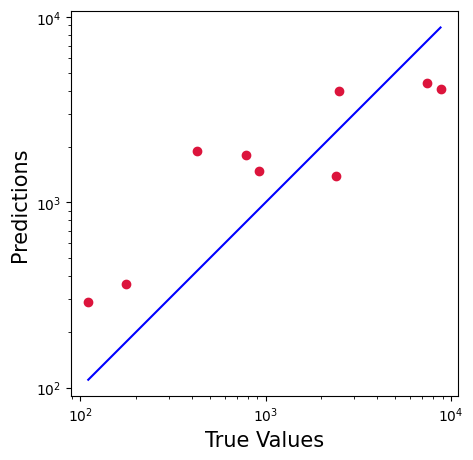

In [34]:
#Fit the model to our dataset to predict values 
model = RandomForestRegressor(random_state=1,n_estimators=400)
model.fit(X_train_new,y_train)
val_predict = model.predict(X_valid_new)
#setup plot variables 
plt.figure(figsize=(5,5))
plt.scatter(y_test, val_predict, c='crimson')
plt.yscale('log')
plt.xscale('log')
#plot our results 
p1 = max(max(val_predict), max(y_test))
p2 = min(min(val_predict), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

We can see the predicted values are nowhere near the true values but, they have slight corelation with each other. This means that our model ,while can't accurately predict the stock price but can definitely indicate the price range of that stock. 

### 6 : Findings 

* While the scraped data was too limited to have built a machine learning model ,we got a few fetures on which the stock price of a company depends on.
* We already knew that P/E ratio, P/B ratio and P/S ratio would corelate with the stock price since these ratios are indicative of the financial health of a company 
* This analysis also shows that the number of shares a company has listed on the index, has a decent corelation with the stock price 
* The model,though extremely inaccurate ,can indicate if a company's stock price will be high or low 
* The main purpose of this project was to scrap important indicators and ratios from the Yahoo finance website.
* THe nifty 50 is a stock market index on which any Indian stock is compared with .
* The trends these stock follow is extremely important since they are used as a benchmark in the market 
* I am aware that the model in this project would have been better if it had been based on about 100 -200 companies 